In [1]:
#    ____       _       _
#   |  _ \  ___| |_ __ | |__   __ _  ___
#   | | | |/ _ \ | '_ \| '_ \ / _` |/ _ \
#   | |_| |  __/ | |_) | | | | (_| |  __/
#   |____/ \___|_| .__/|_| |_|\__,_|\___|
#                |_|

In [2]:
%pylab inline
from scipy.integrate import odeint
from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


### 2 real roots
$
ax^2y''+bxy'+cy=0\\
D = (b-a)^2 -4ac,\ D>0\\
y = c_1x^{r_1} + c_2x^{r_2}\\
r_1, r_2 = \frac{(a-b)+\sqrt D}{2a}
$

https://www.wolframalpha.com/input/?i=2x%5E2y%27%27+%2B+5xy%27+%2B+y+%3D+0,+y(1)%3D0,++y%27(1)%3D1

True
roots -1.0 -0.5
contstants -2.0 2.0


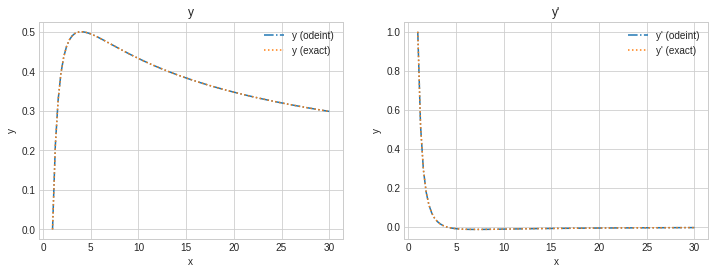

In [3]:
# 2 real roots
y0 = 0
y1 = 1

a = 2
b = 5
c = 1
D = (b-a)**2 - 4*a*c
print D > 0

#r1, r2 = np.roots([1, b-1, c])
#print r1, r2

r1 = ((a-b)-np.sqrt(D))/(2*a)
r2 = ((a-b)+np.sqrt(D))/(2*a)
print 'roots', r1, r2

#def const((c1,c2)):
#    f1 = c1 + c2 - y0
#    f2 = r1*c1 + r2*c2 - y1
#    return f1, f2
##1, c2 = fsolve(const, [1,1])
#print c1, c2

c1 = (r2*y0-y1)/(r2-r1)
c2 = (r1*y0-y1)/(r1-r2)
print 'contstants', c1, c2

# exact
def Y(x):
    return c1*np.power(x, r1) + c2*np.power(x, r2)
def dY(x):
    return r1*c1*np.power(x, r1-1) + r2*c2*np.power(x, r2-1)

# odeint
def model((y0,y1), x):
    y2 = -b*y1/(a*x) - c*y0/(a*x*x)
    return y1, y2

x = np.linspace(1,30,100)
ys = odeint(model, [y0,y1], x)

# plots
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(12,4))
ax0.plot(x, ys[:,0], '-.', label="y (odeint)")
ax0.plot(x, Y(x), ':', label="y (exact)")
ax0.set_title("y")
ax1.plot(x, ys[:,1], '-.', label="y' (odeint)")
ax1.plot(x, dY(x), ':', label="y' (exact)")
ax1.set_title("y'")

for ax in [ax0,ax1]:
    ax.legend();
    ax.set_xlabel('x')
    ax.set_ylabel('y')

### 1 real root
$
ax^2y''+bxy'+cy=0\\
D = (b-a)^2 -4ac,\ D=0\\
y = c_1x^{r} + c_2x^{r}log(x)\\
r = \frac{(a-b)}{2a}
$

https://www.wolframalpha.com/input/?i=6x%5E2y%27%27+%2B+3xy%27+%2B+0.375y+%3D+0,+y(1)%3D0,++y%27(1)%3D1

c 2.25
True
root 0.75
-2.0 2.0
constants 0 1.0


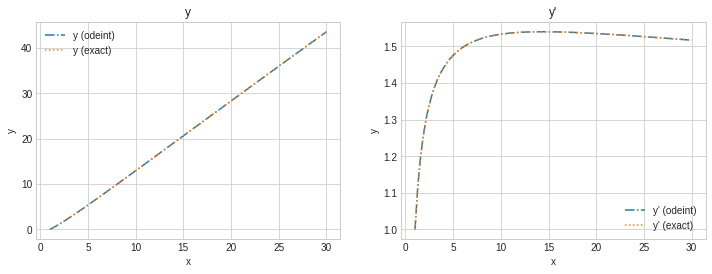

In [4]:
# 1 real root
y0 = 0
y1 = 1

a = 4
b = -2
c = (b-a)**2/(4.0*a)
print 'c' , c
D = (b-a)**2 - 4.0*a*c
print D == 0

#print np.roots([a, b-a, c])

r = (a-b)/(2.0*a)
print 'root', r

#def const((c1,c2)):
#    x = 1
#    f1 = c1*x**r + c2*x**r*np.log(x) - y0
#    f2 = r*c1*x**(r-1) + c2*( r*x**(r-1)*np.log(x) + x**(r-1) ) - y1
#    return f1, f2
#c1, c2 = fsolve(const, [1,1])
print c1, c2

c1 = y0
c2 = y1-r*y0
print 'constants', c1, c2

# exact
def Y(x):
    return c1*np.power(x,r) + c2*np.power(x,r)*np.log(x)
def dY(x):
    return r*c1*np.power(x,r-1) + c2*(r*np.power(x,r-1)*np.log(x) + np.power(x,r-1))

# odeint
def model((y0,y1), x):
    y2 = -b*y1/(a*x) - c*y0/(a*x*x)
    return y1, y2

x = np.linspace(1,30,100)
ys = odeint(model, [y0,y1], x)

# plots
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(12,4))
ax0.plot(x, ys[:,0], '-.', label="y (odeint)")
ax0.plot(x, Y(x), ':', label="y (exact)")
ax0.set_title("y")
ax1.plot(x, ys[:,1], '-.', label="y' (odeint)")
ax1.plot(x, dY(x), ':', label="y' (exact)")
ax1.set_title("y'")

for ax in [ax0,ax1]:
    ax.legend();
    ax.set_xlabel('x')
    ax.set_ylabel('y')

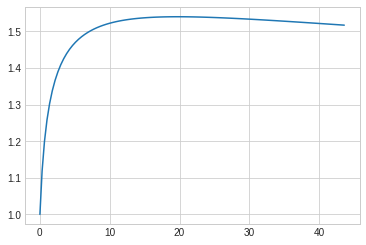

In [5]:
plt.plot(ys[:,0], ys[:,1])

### complex roots
#### will follow soon.....